# CO31 - Laplace's Equation
Calum Holker

In [303]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.lines import Line2D
matplotlib.use("pgf")
%matplotlib inline

## Solve Laplace's Equatation
Solves Laplace's equation using the over-relaxation method

Input:

        init_psi - 2D matrix containing the initial \psi, including boundaries

        alpha - the coefficient of relaxation

        N_iter - maximum number of iterations performed

Output:
        
        psi - 2D matrix of the value of \psi after (up to) N_iter iterations

        hist_values - (N_iter x 3) matrix that contains historical values of 3 points during the iteration
                      1 in upper half, 1 in middle, 1 in lower half

Constraints:

        The boundaries of \psi are kept constant during the iterations

In [281]:
def solve_laplace (init_psi, alpha, N_iter):
    psi = init_psi
    hist_values = [[init_psi[1,5]],[init_psi[3,3]],[init_psi[5,1]]]
    while N_iter > 0:
        sum_squares = 0
        for i in range(1,6):
            for j in range(1,6):
                Rm = psi[i,j+1] + psi[i+1,j] + psi[i-1,j] + psi[i,j-1] - (4*psi[i,j])
                sum_squares = sum_squares + (Rm ** 2)
                psi[i,j] = psi[i,j] + ((alpha * Rm)/4)
                if (i == 1) and (j == 5):
                    hist_values[0].append(psi[1,5])
                if (i == 3) and (j == 3):
                    hist_values[1].append(psi[3,3])
                if (i == 5) and (j == 1):
                    hist_values[2].append(psi[5,1])
        N_iter = N_iter - 1
        if sum_squares < 0.001:
            break
    return psi, hist_values

In [282]:
def get_init_psi(n):
    init_psi = np.zeros((n, n))
    d = 1/(n-1)
    for i in range(n):
        init_psi[0,i] = np.sin(i*d)*np.sinh(1)
        init_psi[i,n-1] = np.sin(1)*np.sinh((6-i)*d)
    return init_psi

In [283]:
def solve_laplace_analytically(x,y):
    return np.sin(x)*np.sinh(y)

In [284]:
dx = 1/6
a = solve_laplace_analytically(dx*3, dx*3)
print(a)

0.24982639750046154


In [285]:
alpha = 1.4
N_iter = 30
init_psi = get_init_psi(7)

psi, hist_values = solve_laplace(init_psi,alpha,N_iter)

In [305]:
x = np.linspace(0,1,7)
y = np.linspace(1,0,7)
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, psi, cmap='autumn')
ax.set_xlabel('x', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('$\psi$', fontsize=13)
ax.set_ylim(1,0)
ax.view_init(30, 135)

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/calum/.matplotlib/tex.cache/c663db4002e1da9995f3f66423e10a41.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-03-06>
(/usr/local/texlive/2020basic/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/local/texlive/2020basic/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.5 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on c663db4002e1da9995f3f66423e10a41.log.




<ipython-input-287-ca3ada17d30b>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=round(value_1,3), xy=(7.5, value_1-0.05), color='dimgray')
<ipython-input-287-ca3ada17d30b>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s="{:.3f}".format(round(value_2,3)), xy=(7.5, value_2+0.03), color='dimgray')
<ipython-input-287-ca3ada17d30b>:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=round(value_3,3), xy=(7.5, value_3+0.03), color='dimgray')


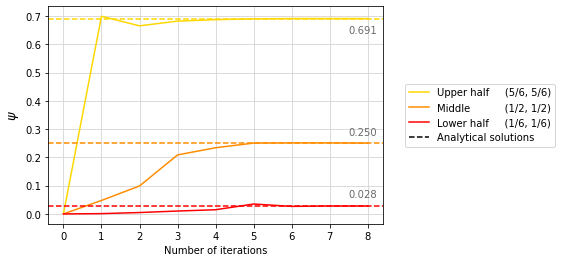

In [287]:
t = np.arange(0,len(hist_values[1]),1)

plt.plot(t, hist_values[0], label='Upper Half (5/6, 5/6)', color='gold')
value_1 = solve_laplace_analytically(5/6, 5/6)
plt.axhline(y=value_1, color='gold', linestyle='--')

plt.plot(t, hist_values[1], label='Middle (1/2, 1/2)', color='darkorange')
value_2 = solve_laplace_analytically(3/6, 3/6)
plt.axhline(y=value_2, color='darkorange', linestyle='--')

plt.plot(t, hist_values[2], label = 'Lower Half (1/6, 1/6)', color='red')
value_3 = solve_laplace_analytically(1/6, 1/6)
plt.axhline(y=value_3, color='red', linestyle='--')

legend_elements = [Line2D([0],[0],color='gold', label='Upper half     (5/6, 5/6)'), Line2D([0],[0], color='darkorange', label='Middle           (1/2, 1/2)'), Line2D([0],[0], color='red', label='Lower half     (1/6, 1/6)'), Line2D([0],[0],color='black', label='Analytical solutions', linestyle='--')]

plt.xticks(t)
plt.xlabel('Number of iterations')
plt.ylabel('$\psi$', fontsize=13)
plt.grid(color='lightgrey')
plt.annotate(s=round(value_1,3), xy=(7.5, value_1-0.05), color='dimgray')
plt.annotate(s="{:.3f}".format(round(value_2,3)), xy=(7.5, value_2+0.03), color='dimgray')
plt.annotate(s=round(value_3,3), xy=(7.5, value_3+0.03), color='dimgray')
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.savefig("Plot2")

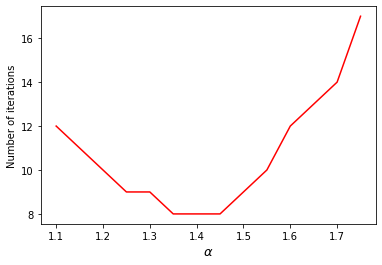

In [288]:
N_iter = 30
alphas = np.arange(1.1,1.8,0.05)
convergence = []
for alpha in alphas:
    init_psi = get_init_psi(7)
    psi, hist_values = solve_laplace(init_psi,alpha,N_iter)
    convergence.append(len(hist_values[0])-1)

plt.plot(alphas,convergence,color='red')
plt.xlabel(r'$\alpha$', fontsize=13)
plt.ylabel('Number of iterations')

plt.savefig("Plot3")

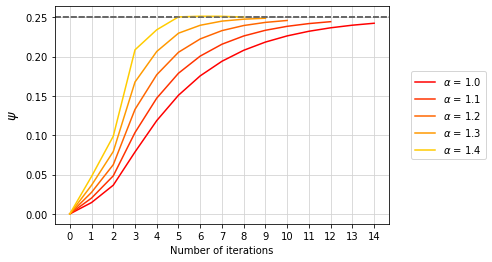

In [289]:
alphas = [1.0,1.1,1.2,1.3,1.4]
N_iter = 30
init_psi = get_init_psi(7)
colours = plt.cm.autumn(np.linspace(0,1,len(alphas)+1))
tmax = []

for alpha in alphas:
    init_psi = get_init_psi(7)
    psi, hist_values = solve_laplace(init_psi,alpha,N_iter)

    t = np.arange(0,len(hist_values[1]),1)
    if len(t)>len(tmax):
        tmax = t

    plt.plot(t, hist_values[1], label=r'$\alpha$ = ' + str(alpha), color=colours[alphas.index(alpha)])
    value_2 = solve_laplace_analytically(3/6, 3/6)
    plt.axhline(y=value_2, color='dimgray', linestyle='--')

plt.xticks(tmax)
plt.xlabel('Number of iterations')
plt.ylabel('$\psi$', fontsize=13)
plt.grid(color='lightgrey')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.savefig("Plot4")

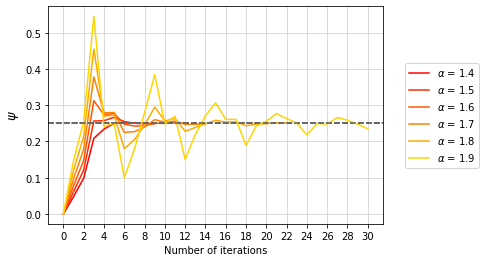

In [290]:
alphas = [1.4,1.5,1.6,1.7,1.8,1.9]
N_iter = 30
init_psi = get_init_psi(7)
colours = plt.cm.autumn(np.linspace(0,1,len(alphas)+1))
tmax = []

for alpha in alphas:
    init_psi = get_init_psi(7)
    psi, hist_values = solve_laplace(init_psi,alpha,N_iter)

    t = np.arange(0,len(hist_values[1]),1)
    if len(t)>len(tmax):
        tmax = t

    plt.plot(t, hist_values[1], label=r'$\alpha$ = ' + str(alpha), color=colours[alphas.index(alpha)])
    value_2 = solve_laplace_analytically(3/6, 3/6)
    plt.axhline(y=value_2, color='dimgray', linestyle='--')

plt.xticks(tmax[0:31:2])
plt.xlabel('Number of iterations')
plt.ylabel('$\psi$', fontsize=13)
plt.grid(color='lightgrey')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.savefig("Plot5")

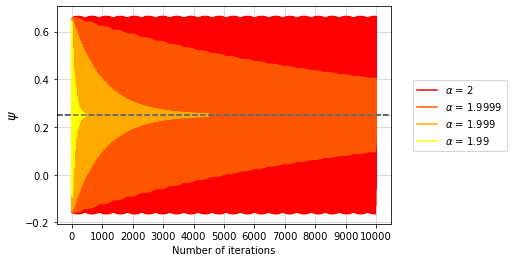

In [291]:
alphas = [2,1.9999,1.999,1.99]
N_iter = 10000
init_psi = get_init_psi(7)
colours = plt.cm.autumn(np.linspace(0,1,len(alphas)))
tmax = []

for alpha in alphas:
    init_psi = get_init_psi(7)
    psi, hist_values = solve_laplace(init_psi,alpha,N_iter)

    t = np.arange(0,len(hist_values[1]),1)
    if len(t)>len(tmax):
        tmax = t

    plt.plot(t, hist_values[1], label=r'$\alpha$ = ' + str(alpha), color=colours[alphas.index(alpha)])
    value_2 = solve_laplace_analytically(3/6, 3/6)
    plt.axhline(y=value_2, color='dimgray', linestyle='--')

plt.xticks(tmax[0:N_iter+1:1000])
plt.xlabel('Number of iterations')
plt.ylabel('$\psi$', fontsize=13)
plt.grid(color='lightgrey')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.savefig("Plot6")

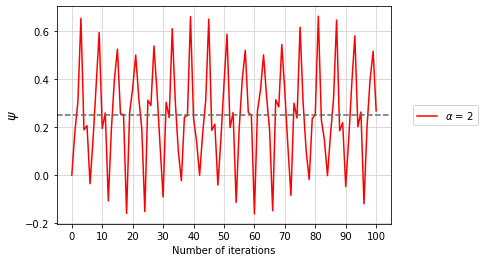

In [292]:
alphas = [2]
N_iter = 100
init_psi = get_init_psi(7)
colours = plt.cm.autumn(np.linspace(0,1,len(alphas)))
tmax = []

for alpha in alphas:
    init_psi = get_init_psi(7)
    psi, hist_values = solve_laplace(init_psi,alpha,N_iter)

    t = np.arange(0,len(hist_values[1]),1)
    if len(t)>len(tmax):
        tmax = t

    plt.plot(t, hist_values[1], label=r'$\alpha$ = ' + str(alpha), color=colours[alphas.index(alpha)])
    value_2 = solve_laplace_analytically(3/6, 3/6)
    plt.axhline(y=value_2, color='dimgray', linestyle='--')

plt.xticks(tmax[0:N_iter+1:10])
plt.xlabel('Number of iterations')
plt.ylabel('$\psi$', fontsize=13)
plt.grid(color='lightgrey')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.savefig("Plot7")

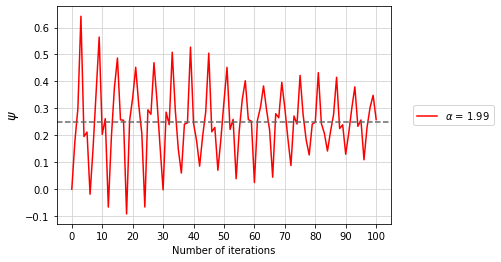

In [293]:
alphas = [1.99]
N_iter = 100
init_psi = get_init_psi(7)
colours = plt.cm.autumn(np.linspace(0,1,len(alphas)))
tmax = []

for alpha in alphas:
    init_psi = get_init_psi(7)
    psi, hist_values = solve_laplace(init_psi,alpha,N_iter)

    t = np.arange(0,len(hist_values[1]),1)
    if len(t)>len(tmax):
        tmax = t

    plt.plot(t, hist_values[1], label=r'$\alpha$ = ' + str(alpha), color=colours[alphas.index(alpha)])
    value_2 = solve_laplace_analytically(3/6, 3/6)
    plt.axhline(y=value_2, color='dimgray', linestyle='--')

plt.xticks(tmax[0:N_iter+1:10])
plt.xlabel('Number of iterations')
plt.ylabel('$\psi$', fontsize=13)
plt.grid(color='lightgrey')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.savefig("Plot8")

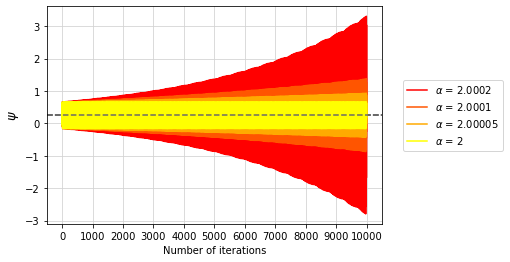

In [294]:
alphas = [2.0002,2.0001,2.00005,2]
N_iter = 10000
init_psi = get_init_psi(7)
colours = plt.cm.autumn(np.linspace(0,1,len(alphas)))
tmax = []

for alpha in alphas:
    init_psi = get_init_psi(7)
    psi, hist_values = solve_laplace(init_psi,alpha,N_iter)

    t = np.arange(0,len(hist_values[1]),1)
    if len(t)>len(tmax):
        tmax = t

    plt.plot(t, hist_values[1], label=r'$\alpha$ = ' + str(alpha), color=colours[alphas.index(alpha)])
    value_2 = solve_laplace_analytically(3/6, 3/6)
    plt.axhline(y=value_2, color='dimgray', linestyle='--')

plt.xticks(tmax[0:N_iter+1:1000])
plt.xlabel('Number of iterations')
plt.ylabel('$\psi$', fontsize=13)
plt.grid(color='lightgrey')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.savefig("Plot9")

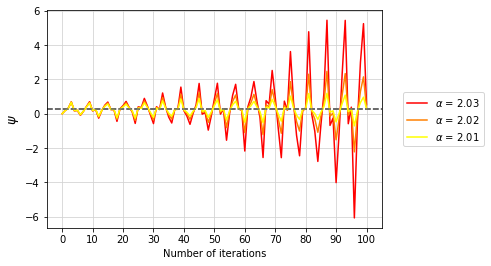

In [264]:
alphas = [2.03,2.02,2.01]
N_iter = 100
init_psi = get_init_psi(7)
colours = plt.cm.autumn(np.linspace(0,1,len(alphas)))
tmax = []

for alpha in alphas:
    init_psi = get_init_psi(7)
    psi, hist_values = solve_laplace(init_psi,alpha,N_iter)

    t = np.arange(0,len(hist_values[1]),1)
    if len(t)>len(tmax):
        tmax = t

    plt.plot(t, hist_values[1], label=r'$\alpha$ = ' + str(alpha), color=colours[alphas.index(alpha)])
    value_2 = solve_laplace_analytically(3/6, 3/6)
    plt.axhline(y=value_2, color='dimgray', linestyle='--')

plt.xticks(tmax[0:N_iter+1:10])
plt.xlabel('Number of iterations')
plt.ylabel('$\psi$', fontsize=13)
plt.grid(color='lightgrey')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

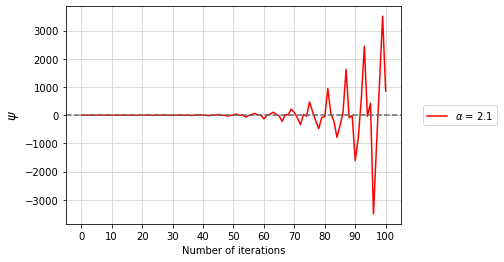

In [265]:
alphas = [2.1]
N_iter = 100
init_psi = get_init_psi(7)
colours = plt.cm.autumn(np.linspace(0,1,len(alphas)))
tmax = []

for alpha in alphas:
    init_psi = get_init_psi(7)
    psi, hist_values = solve_laplace(init_psi,alpha,N_iter)

    t = np.arange(0,len(hist_values[1]),1)
    if len(t)>len(tmax):
        tmax = t

    plt.plot(t, hist_values[1], label=r'$\alpha$ = ' + str(alpha), color=colours[alphas.index(alpha)])
    value_2 = solve_laplace_analytically(3/6, 3/6)
    plt.axhline(y=value_2, color='dimgray', linestyle='--')

plt.xticks(tmax[0:N_iter+1:10])
plt.xlabel('Number of iterations')
plt.ylabel('$\psi$', fontsize=13)
plt.grid(color='lightgrey')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')